In [3]:
# !pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c # return counts
import seaborn as sns #used for data Visualization
import matplotlib.pyplot as plt
#import missingno as msno #finding missing values
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error#model performance
import pickle #Python object hierarchy is converted into a byte stream,
from sklearn.linear_model import LinearRegression #Regresssion ML algorithm

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_dba9bbd52a9f4047affec71ab353fca2 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_dba9bbd52a9f4047affec71ab353fca2 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_dba9bbd52a9f4047affec71ab353fca2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RDxN-4FVgsCfHrxmyld7rBPdSmRHX0Wec-5Bfjo30Yg-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_dba9bbd52a9f4047affec71ab353fca2)

body = client_dba9bbd52a9f4047affec71ab353fca2.get_object(Bucket='co2emission-donotdelete-pr-7pezomygwqxl96',Key='Indicators.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
#data = pd.read_csv('Indicators.csv')


ModuleNotFoundError: No module named 'botocore'

In [ ]:
data.shape

In [71]:
data.Value.round(2)

0              133.56
1               87.80
2                6.63
3               81.02
4          3000000.00
              ...    
5656453         36.00
5656454         90.00
5656455        242.00
5656456          3.30
5656457         32.80
Name: Value, Length: 5656458, dtype: float64

In [72]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [73]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [74]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [75]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

In [76]:
print(min(years)," to ",max(years))

1960  to  2015


In [77]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]


In [78]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


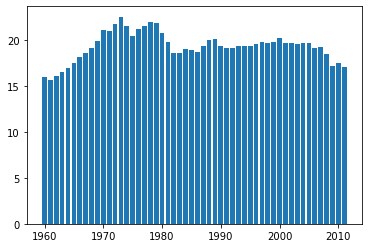

In [79]:
# get the years
years = stage['Year'].values
# get the values 

co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

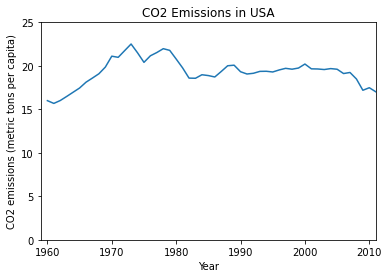

In [80]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])
#plt.plot(stage['Year'].values, stage['Value'].values)

plt.show()

In [81]:
# If we want to just include those within one standard deviation fo the mean, we could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [82]:
print(len(hist_data))

52


In [83]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [84]:
print(len(co2_2011))

232


AttributeError: 'Rectangle' object has no property 'normed'

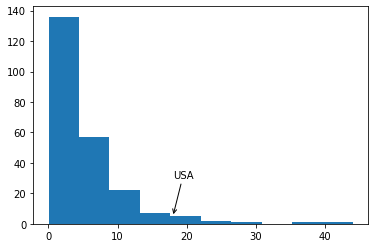

In [85]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

### Relationship between GDP and CO2 Emissions in USA

In [86]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [87]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [88]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


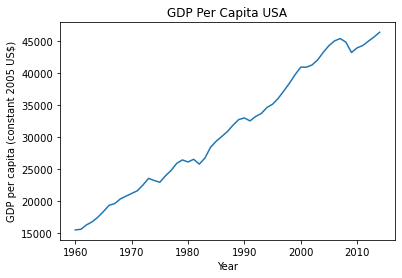

In [89]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [90]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [91]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


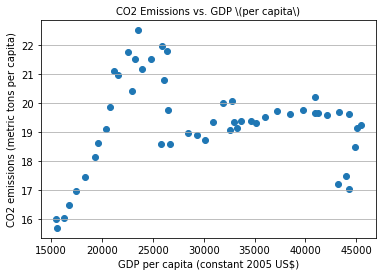

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[10],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [93]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [94]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [95]:
data.describe()  # returns important values for continous column data

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [96]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4]))

In [97]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [98]:
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : CountryName
count of classes :  247
Counter({'Mexico': 37244, 'Colombia': 37227, 'Philippines': 36912, 'Peru': 36815, 'Costa Rica': 36457, 'Thailand': 36355, 'Morocco': 36275, 'Indonesia': 36252, 'Malaysia': 35874, 'Turkey': 35819, 'Ecuador': 35788, 'Pakistan': 35768, 'India': 35721, 'Brazil': 35550, 'Egypt, Arab Rep.': 35367, 'Bolivia': 35307, 'Tunisia': 35302, 'Honduras': 35171, 'Guatemala': 35078, 'El Salvador': 34739, 'Kenya': 34621, 'Algeria': 34578, 'Cameroon': 34259, 'Dominican Republic': 34253, 'Jordan': 34050, 'Senegal': 33990, 'Panama': 33984, 'Nicaragua': 33638, 'Bangladesh': 33386, 'Sri Lanka': 33369, 'Togo': 33221, 'Iran, Islamic Rep.': 32966, 'Benin': 32965, 'Zambia': 32930, 'Madagascar': 32637, 'Burkina Faso': 32604, 'Congo, Rep.': 32310, 'Mauritius': 32285, 'Botswana': 32039, 'Jamaica': 31835, 'Rwanda': 31770, 'Ghana': 31730, 'Paraguay': 31423, 'Uganda': 31412, 'Nigeria': 31381, 'Congo, Dem. Rep.': 31257, 'Sudan': 31175, 'Latin America & Caribbean (developing o

count of classes :  1344
Counter({'Population, total': 13484, 'Population growth (annual %)': 13442, 'Rural population (% of total population)': 13415, 'Urban population (% of total)': 13415, 'Rural population': 13374, 'Urban population': 13374, 'Urban population growth (annual %)': 13337, 'Surface area (sq. km)': 13090, 'Land area (sq. km)': 13086, 'Rural population growth (annual %)': 13061, 'Population density (people per sq. km of land area)': 12988, 'Death rate, crude (per 1,000 people)': 12486, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 12485, 'Birth rate, crude (per 1,000 people)': 12485, 'Population ages 65 and above (% of total)': 12426, 'Population, ages 0-14 (% of total)': 12426, 'Population, ages 15-64 (% of total)': 12426, 'Population, female (% of total)': 12426, 'Age dependency ratio (% of working-age population)': 12423, 'Age dependency ratio, old (% of working-age population)': 12423, 'Age dependency ratio, young (% of working-age population)': 12

count of classes :  1344
Counter({'SP.POP.TOTL': 13484, 'SP.POP.GROW': 13442, 'SP.RUR.TOTL.ZS': 13415, 'SP.URB.TOTL.IN.ZS': 13415, 'SP.RUR.TOTL': 13374, 'SP.URB.TOTL': 13374, 'SP.URB.GROW': 13337, 'AG.SRF.TOTL.K2': 13090, 'AG.LND.TOTL.K2': 13086, 'SP.RUR.TOTL.ZG': 13061, 'EN.POP.DNST': 12988, 'SP.DYN.CDRT.IN': 12486, 'SP.ADO.TFRT': 12485, 'SP.DYN.CBRT.IN': 12485, 'SP.POP.65UP.TO.ZS': 12426, 'SP.POP.0014.TO.ZS': 12426, 'SP.POP.1564.TO.ZS': 12426, 'SP.POP.TOTL.FE.ZS': 12426, 'SP.POP.DPND': 12423, 'SP.POP.DPND.OL': 12423, 'SP.POP.DPND.YG': 12423, 'SP.DYN.LE00.FE.IN': 12304, 'SP.DYN.LE00.MA.IN': 12304, 'SP.DYN.LE00.IN': 12304, 'SP.DYN.TFRT.IN': 12266, 'SP.DYN.TO65.FE.ZS': 12258, 'SP.DYN.TO65.MA.ZS': 12258, 'SP.DYN.AMRT.FE': 11939, 'SP.DYN.AMRT.MA': 11939, 'AG.LND.AGRI.K2': 11751, 'AG.PRD.FOOD.XD': 11669, 'AG.LND.AGRI.ZS': 11645, 'AG.PRD.LVSK.XD': 11626, 'AG.LND.ARBL.ZS': 11568, 'AG.PRD.CROP.XD': 11563, 'AG.LND.ARBL.HA.PC': 11545, 'TX.VAL.MRCH.CD.WT': 11248, 'SP.DYN.IMRT.IN': 11201, 'SH.DYN

In [99]:
data.dtypes[data.dtypes!='O'].index.values

array(['Year', 'Value'], dtype=object)

In [100]:
data.isnull().any()#it will return true if any columns is having null values

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [101]:
data.isnull().sum() #used for finding the null values

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [102]:
data=data[data['CountryCode'].str.contains("USA|SGP|IND|ARB|BRB")]

In [103]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [104]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
x='*'
for i in cat:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LE.fit_transform(data[i]) # trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print(x*100)

LABEL ENCODING OF: CountryName
Counter({'India': 35721, 'United States': 24425, 'Singapore': 22600, 'Barbados': 17611, 'Arab World': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: CountryCode
Counter({'IND': 35721, 'USA': 24425, 'SGP': 22600, 'BRB': 17611, 'ARB': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: IndicatorName
Counter({'Mortality rate, infant (per 1,000 live births)': 280, 'Mortality rate, under-5 (per 1,000)': 280, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 275, 'Age dependency ratio (% of working-age population)': 275, 'Age dependency ratio, old (% of working-age population)': 275, 'Age dependency ratio, young (% of working-age population)': 275, 'Merchandise exports (curr

In [105]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


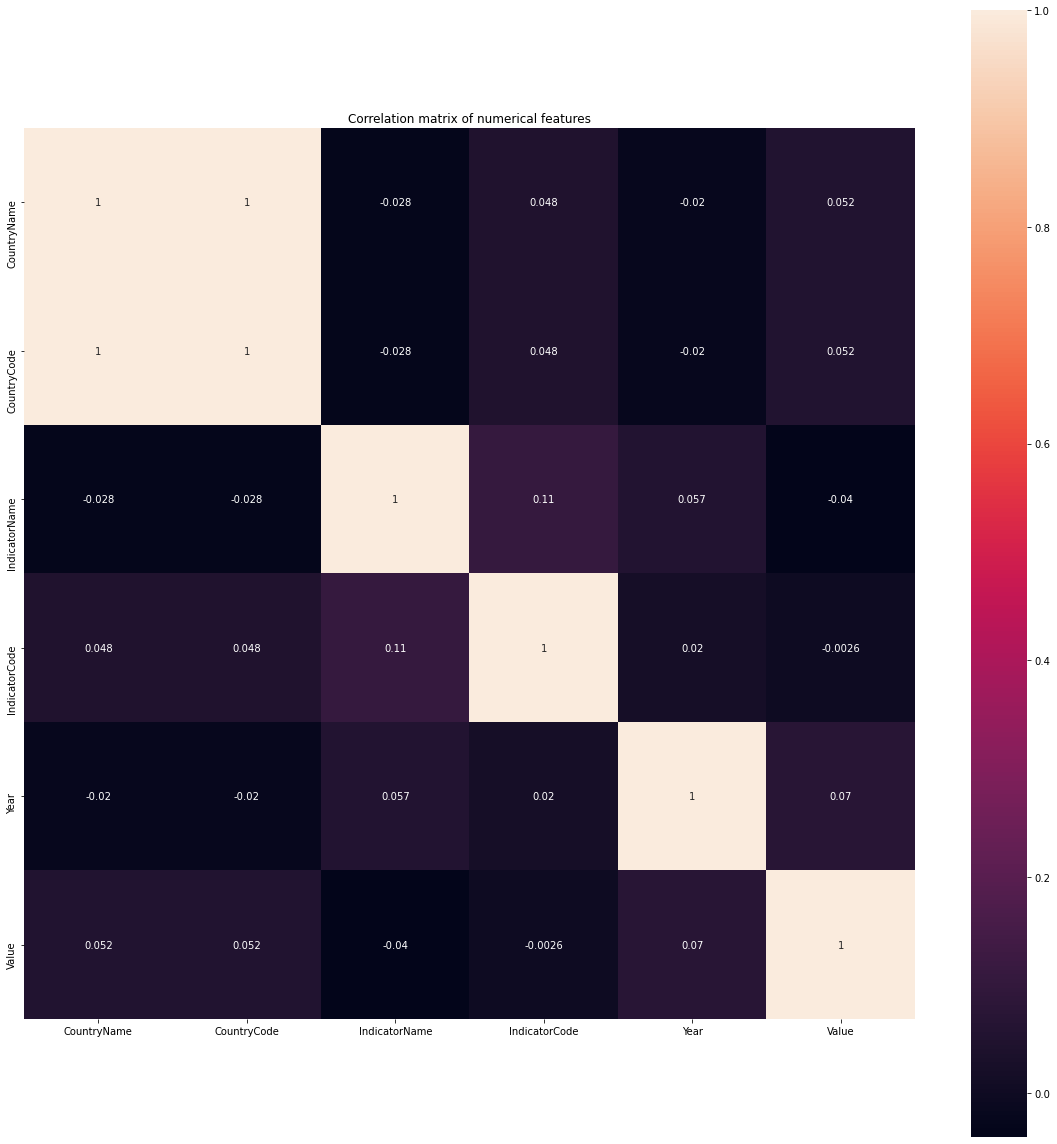

In [106]:
corr = data.corr() #perform correlation between all continous features
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, square=True) #plotting heatmap of correlations
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

<AxesSubplot:>

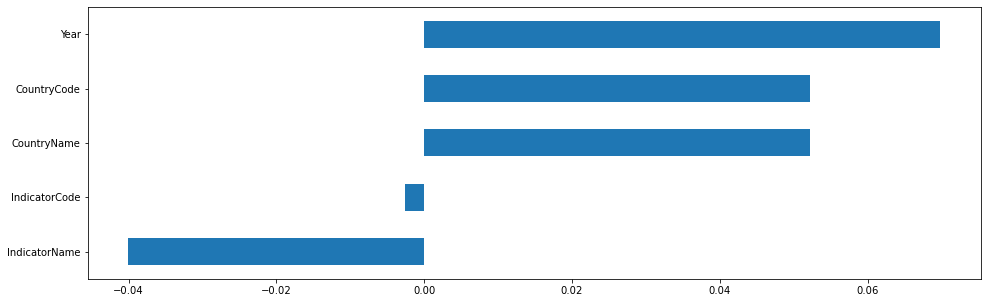

In [107]:
plt.figure(figsize=(16,5))
corr["Value"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [108]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117472 entries, 0 to 5655835
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryName    117472 non-null  int64  
 1   CountryCode    117472 non-null  int64  
 2   IndicatorName  117472 non-null  int64  
 3   IndicatorCode  117472 non-null  int64  
 4   Year           117472 non-null  int64  
 5   Value          117472 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 6.3 MB


In [110]:
x = data.drop(['Value','IndicatorCode'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['Value'] #dependent feature
y=pd.DataFrame(y)

In [111]:
x.head()

,CountryName,CountryCode,IndicatorName,Year
0,0,0,40,1960
1,0,0,44,1960
2,0,0,45,1960
3,0,0,46,1960
4,0,0,86,1960


In [112]:
y.head()

,Value
0,1.335609e+02
1,8.779760e+01
2,6.634579e+00
3,8.102333e+01
4,3.000000e+06


In [113]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [114]:
type(x)

pandas.core.frame.DataFrame

In [115]:
type(y)

pandas.core.frame.DataFrame

In [116]:
data['CountryCode'].unique()

array([0, 1, 2, 3, 4])

In [117]:
data.shape

(117472, 6)

In [118]:
data["CountryCode"].unique()

array([0, 1, 2, 3, 4])

In [119]:
data['CountryName'].unique()

array([0, 1, 2, 3, 4])

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)


(93977, 4)
(23495, 4)


In [121]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=10,random_state=52)
rand.fit(x_train,y_train)


<ipython-input-121-1e89f5fcb1e4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=52)

In [122]:
x_test

,CountryName,CountryCode,IndicatorName,Year
5453593,2,2,1136,2013
360344,0,0,788,1971
4208247,2,2,339,2006
2958287,2,2,750,1998
2748752,4,4,312,1996
...,...,...,...,...
5585649,2,2,937,2014
1876725,4,4,754,1989
821618,2,2,713,1977
532921,2,2,375,1973


In [123]:
from collections import Counter as c
c(data["CountryCode"])


Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [124]:
c(data["CountryName"])


Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [125]:
ypred=rand.predict(x_test)
print(ypred)

[6.82930000e+01 6.09080000e+07 3.66372531e+01 ... 1.64370676e+10
 8.87279335e+09 9.74340000e+01]


In [126]:
y_test

,Value
5453593,6.800600e+01
360344,6.744000e+07
4208247,2.226165e+01
2958287,1.926160e+01
2748752,1.970370e+00
...,...
5585649,1.417129e+09
1876725,1.392817e+00
821618,1.755728e+10
532921,1.005420e+10


In [127]:
rand.score(x_train,y_train)

0.9952460950124586

In [128]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [129]:
import pickle
pickle.dump(rand,open("co2.pkl","wb"))

In [130]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 24.6 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.166
    Uninstalling ibm-watson-machine-learning-1.0.166:
      Successfully uninstalled ibm-watson-machine-learning-1.0.166


In [131]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [132]:
wml_credentials = {
    "apikey":"XFAZLsvV0OCZHhm0DtMIqj9GA_5M6F6CpZ6fIoKFW5ZZ",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [134]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------  ------------------------
ID                                    NAME              CREATED
1dbe0dfb-a6d7-432e-a061-474e8a965072  co2_space         2021-11-12T15:36:19.460Z
1f79656c-728b-45dc-bb85-b9e364dca016  Nutrition_deploy  2021-11-08T12:48:21.174Z
9366c426-43ac-4915-a0df-c6b0b3385444  airlines_space    2021-10-30T08:30:05.348Z
f4a91ca3-5c91-47a0-8349-af9212100aa3  natural_gas       2021-10-28T07:22:27.160Z
a08278cf-0317-4aa6-89cb-cbc442d23fd6  wind_pred_deploy  2021-10-27T18:10:23.209Z
2a8fe96c-cd28-4fac-9fb3-0b2bc2d2850c  wind_mill_space   2021-10-27T07:06:08.191Z
6522822c-9cdc-40ec-b841-0347b06068fd  demo              2021-08-20T08:09:27.573Z
------------------------------------  ----------------  ------------------------


In [135]:
SPACE_ID="1dbe0dfb-a6d7-432e-a061-474e8a965072"

In [136]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [137]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [138]:
import sklearn
sklearn.__version__

'0.23.2'

In [141]:
MODEL_NAME = 'co2Model'
DEPLOYMENT_NAME = 'co2deploy'
CO2_MODEL = rand

In [142]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [143]:
#Save model
model_details = wml_client.repository.store_model(
    model=CO2_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)